In [40]:
%load_ext autoreload
%autoreload 2
import os, sys
import collections
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append('../../')
from utils import mpl_stylesheet
mpl_stylesheet.banskt_presentation(fontfamily = 'latex-clearsans', fontsize = 18, colors = 'banskt')

basedir = "/cbscratch/franco/trans-eqtl/simulation/ldpruned2/15064_450_10_800_30_100_100_0.01_0.5_0.0_1.0_0.6_4.0_0.1_20_0.02/"

def load_transeqtl_result(simdir, paramsdir):
    trans_eqtls_dict = collections.defaultdict(lambda: collections.defaultdict(dict))
    ff = os.path.join(simdir, paramsdir, "rr.txt")
    if os.path.exists(ff):
        with open(ff) as fin:
            next(fin)
            for line in fin:
                arr = line.split("\t")
                snp = arr[0]
                maf = float(arr[3])
                pval = float(arr[7])
                trans_eqtls_dict[snp]["pval"] = pval
                trans_eqtls_dict[snp]["maf"] = maf
    else:
        print("Error, file does not exist", ff)
        raise
    return trans_eqtls_dict

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../../utils/mpl_stylesheet.py:28: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\usepackage{microtype}',


In [79]:
TranseQTLs_rr = dict()
params_tejaas = "tejaas/permnull_sb0.1/raw_knn30/peer0"

for i in range(1,2):
    simname = "sim{:03d}".format(i)
    print(simname)
    simdir = os.path.join(basedir, simname)
    TranseQTLs_rr[simname] = load_transeqtl_result(simdir, params_tejaas)
    
TranseQTLs_rr2 = dict()
params_tejaas2 = "tejaas/permnull_sb0.03/raw_knn30/peer0"

for i in range(1,2):
    simname = "sim{:03d}".format(i)
    print(simname)
    simdir = os.path.join(basedir, simname)
    TranseQTLs_rr2[simname] = load_transeqtl_result(simdir, params_tejaas2)

sim001
sim001


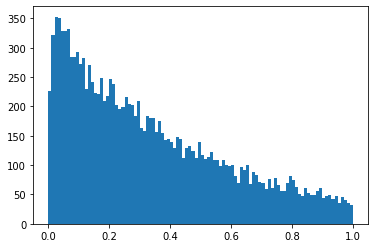

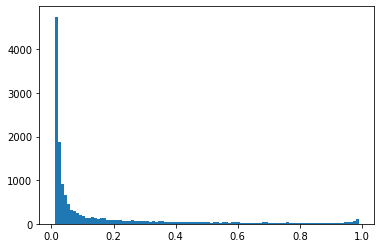

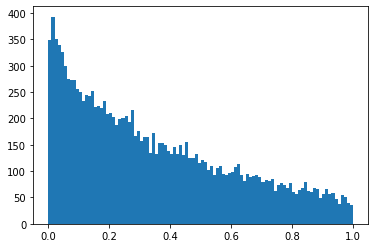

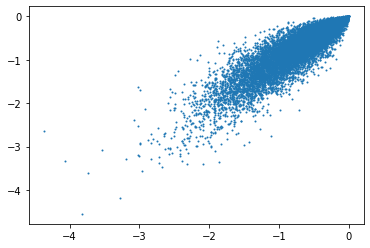

In [83]:
for simname in TranseQTLs_rr:
    pvals = [TranseQTLs_rr[simname][snp]["pval"] for snp in TranseQTLs_rr[simname]]
    mafs = [TranseQTLs_rr[simname][snp]["maf"] for snp in TranseQTLs_rr[simname]]
    plt.hist(pvals, bins=100)
    plt.show()
    plt.hist(mafs, bins=100)
    plt.show()
    
    pvals2 = [TranseQTLs_rr2[simname][snp]["pval"] for snp in TranseQTLs_rr2[simname]]
    mafs2 = [TranseQTLs_rr2[simname][snp]["maf"] for snp in TranseQTLs_rr2[simname]]
    plt.hist(pvals2, bins=100)
    plt.show()
    
    plt.scatter(np.log10(pvals), np.log10(pvals2), s=1)
    plt.show()

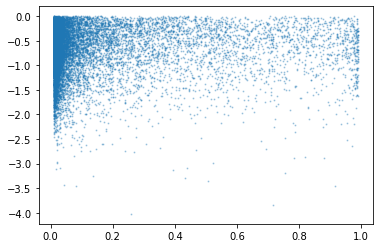

In [48]:
for simname in TranseQTLs_rr:
    pvals = [TranseQTLs_rr[simname][snp]["pval"] for snp in TranseQTLs_rr[simname]]
    mafs = [TranseQTLs_rr[simname][snp]["maf"] for snp in TranseQTLs_rr[simname]]
    plt.scatter(mafs, np.log10(pvals), s=1, alpha=0.3)
    plt.show()

In [84]:
gx_file = os.path.join(basedir, "sim001/input/gx_cclm_norm.txt")
gx_cclm_norm = pd.read_table(gx_file, header=0, index_col=0)
gx_file = os.path.join(basedir, "sim001/input/gx_raw_norm.txt")
gx_raw_norm = pd.read_table(gx_file, header=0, index_col=0)
gx_file = os.path.join(basedir, "sim001/input/gx_qn_norm.txt")
gx_qn_norm = pd.read_table(gx_file, header=0, index_col=0)
gx_file = os.path.join(basedir, "sim001/input/gx_knn30_norm.txt")
gx_knn30_norm = pd.read_table(gx_file, header=0, index_col=0)

In [70]:
u, s, vt = np.linalg.svd(gx_raw_norm.values)
u2, s2, vt2 = np.linalg.svd(gx_cclm_norm.values)
u3, s3, vt3 = np.linalg.svd(gx_qn_norm.values)
u4, s4, vt4 = np.linalg.svd(gx_knn30_norm.values)

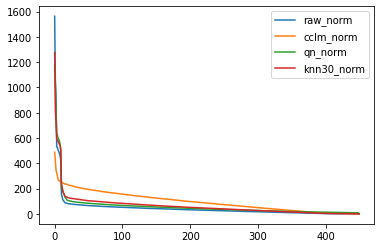

In [72]:
plt.plot(s, label="raw_norm")  #[-20:]
plt.plot(s2, label="cclm_norm")  #[-20:]
plt.plot(s3, label="qn_norm")  #[-20:]
plt.plot(s4, label="knn30_norm")  #[-20:]
plt.legend()
plt.show()

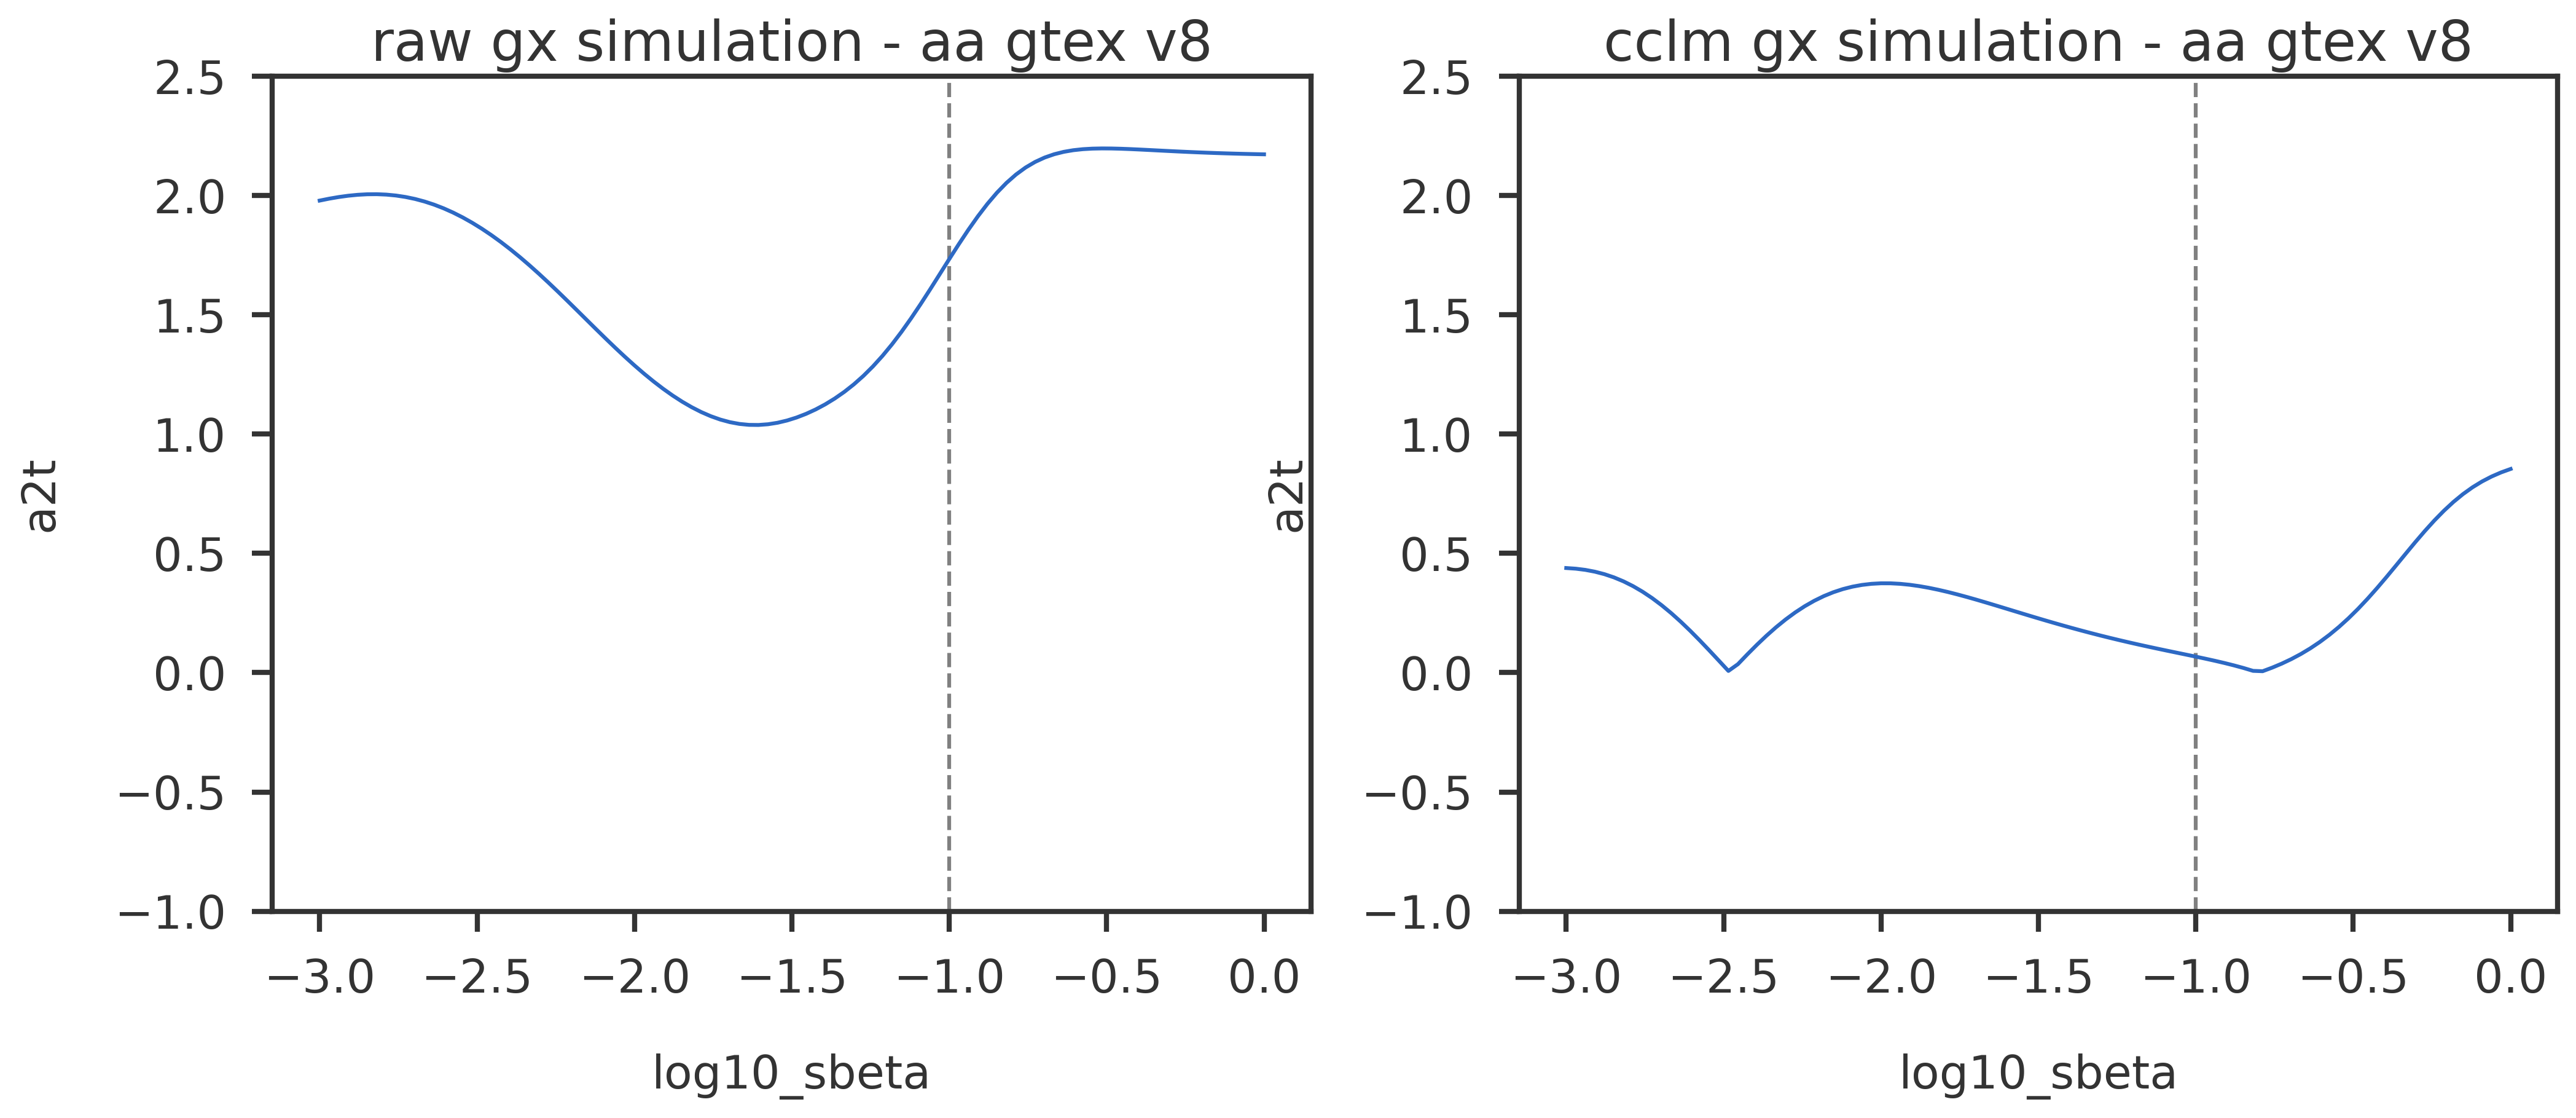

In [42]:
sbeta_raw = list()
a2t_raw = list()
sbeta_cclm = list()
a2t_cclm = list()
resdir = "/usr/users/fsimone/sb_optimization/simulations/15064_450_10_800_30_100_100_0.01_0.5_0.0_1.0_0.6_4.0_0.1_20_0.02/sim001"
with open(os.path.join(resdir,"gx_cclm_norm_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta_raw.append(float(arr[0]))
        a2t_raw.append(abs(float(arr[1])))
        
with open(os.path.join(resdir,"gx_raw_norm_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta_cclm.append(float(arr[0]))
        a2t_cclm.append(abs(float(arr[1])))
        
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax1.plot(np.log10(sbeta_raw), a2t_raw)
ax1.vlines(np.log10(0.1), -1, 2.5, color='gray', linestyle='dashed')
ax1.set_xlabel("log10_sbeta")
ax1.set_ylabel("a2t")
ax1.set_ylim(-1,2.5)
ax1.set_title("raw gx simulation - aa gtex v8")

ax2 = fig.add_subplot(122)
ax2.plot(np.log10(sbeta_cclm), a2t_cclm)
ax2.vlines(np.log10(0.1), -1, 2.5, color='gray', linestyle='dashed')
ax2.set_xlabel("log10_sbeta")
ax2.set_ylabel("a2t")
ax2.set_ylim(-1,2.5)
ax2.set_title("cclm gx simulation - aa gtex v8")


plt.show()

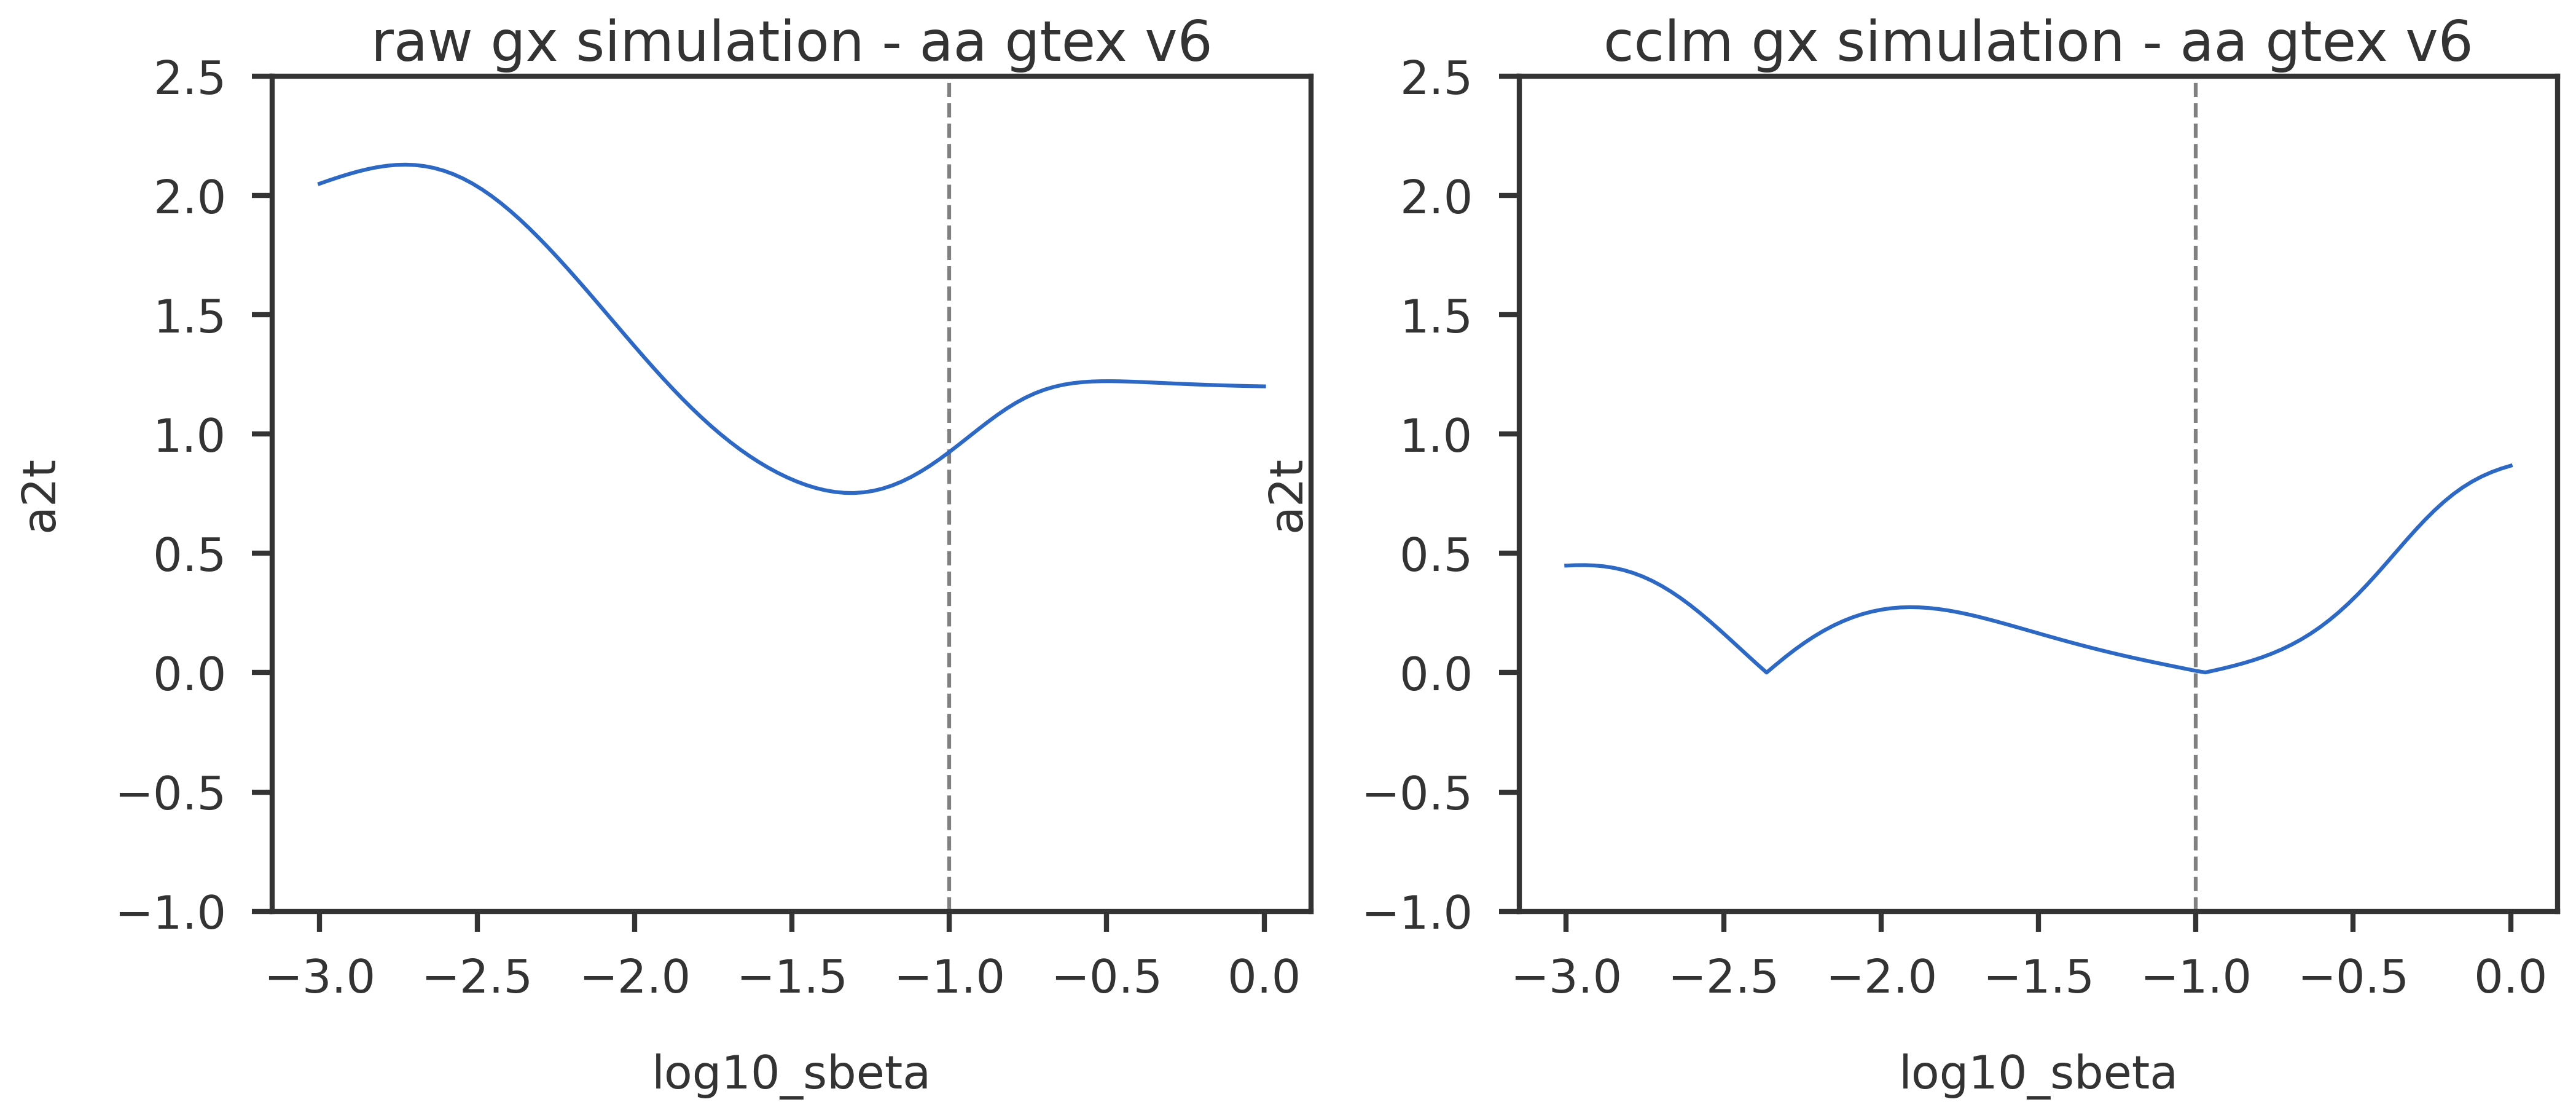

In [43]:
sbeta_raw = list()
a2t_raw = list()
sbeta_cclm = list()
a2t_cclm = list()
resdir = "/usr/users/fsimone/sb_optimization/simulations/12639_450_10_800_30_100_100_0.01_0.5_0.0_1.0_0.6_4.0_0.1_20_0.02/sim001"
with open(os.path.join(resdir,"gx_cclm_norm_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta_raw.append(float(arr[0]))
        a2t_raw.append(abs(float(arr[1])))
        
with open(os.path.join(resdir,"gx_raw_norm_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta_cclm.append(float(arr[0]))
        a2t_cclm.append(abs(float(arr[1])))
        
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax1.plot(np.log10(sbeta_raw), a2t_raw)
ax1.vlines(np.log10(0.1), -1, 2.5, color='gray', linestyle='dashed')
ax1.set_xlabel("log10_sbeta")
ax1.set_ylabel("a2t")
ax1.set_ylim(-1,2.5)
ax1.set_title("raw gx simulation - aa gtex v6")

ax2 = fig.add_subplot(122)
ax2.plot(np.log10(sbeta_cclm), a2t_cclm)
ax2.vlines(np.log10(0.1), -1, 2.5, color='gray', linestyle='dashed')
ax2.set_xlabel("log10_sbeta")
ax2.set_ylabel("a2t")
ax2.set_ylim(-1,2.5)
ax2.set_title("cclm gx simulation - aa gtex v6")


plt.show()

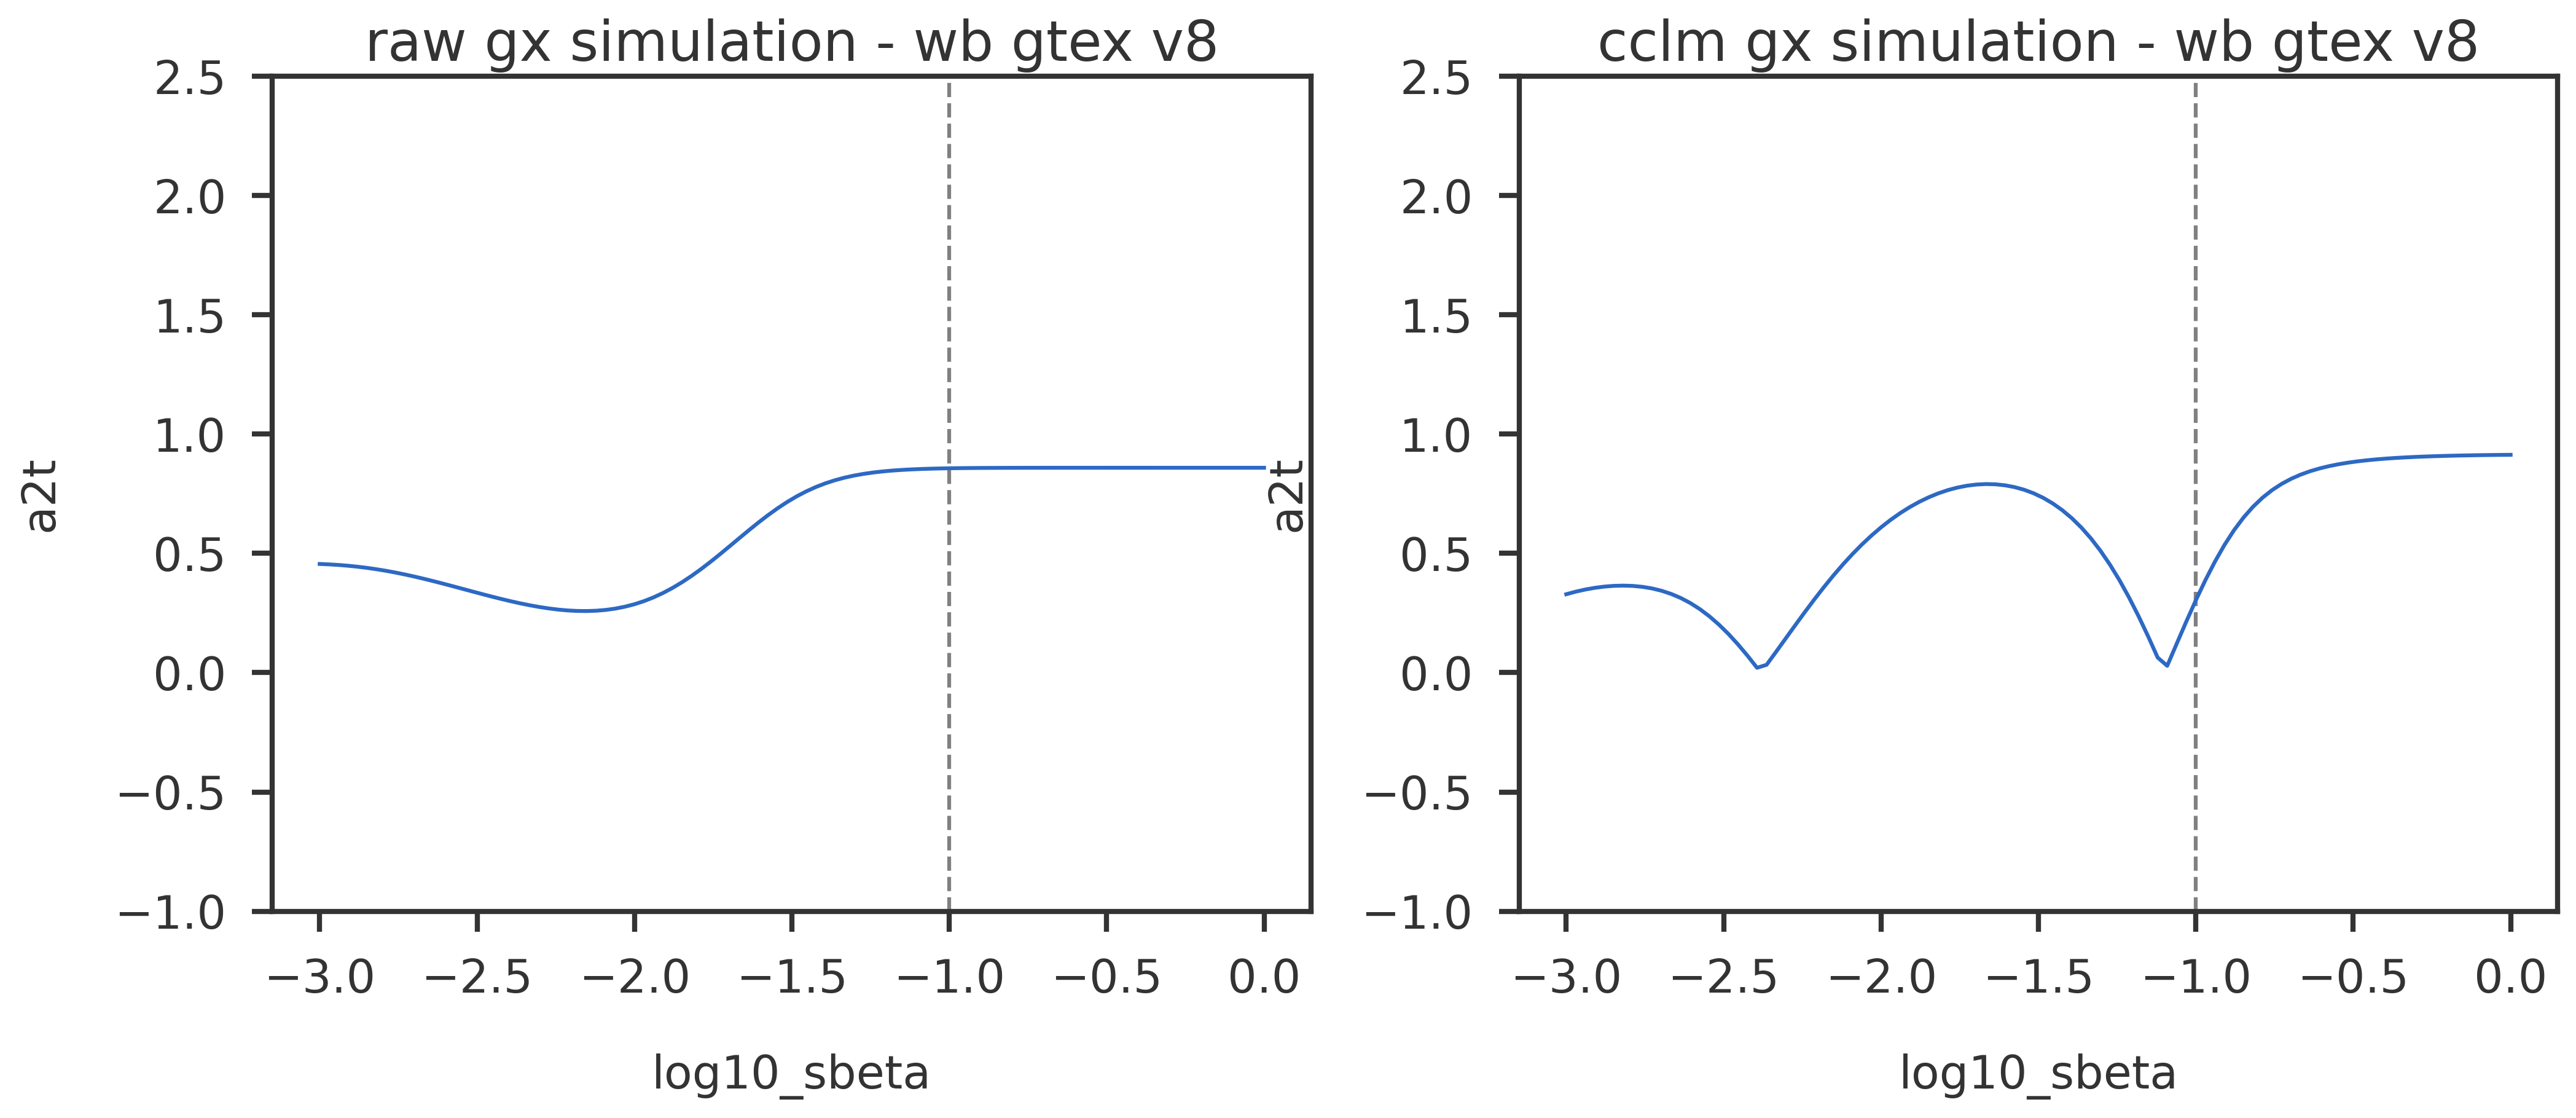

In [44]:
sbeta_raw = list()
a2t_raw = list()
sbeta_cclm = list()
a2t_cclm = list()
resdir = "/usr/users/fsimone/sb_optimization/simulations/11995_450_10_800_30_100_100_0.01_0.5_0.0_1.0_0.6_4.0_0.1_20_0.02/sim001"
with open(os.path.join(resdir,"gx_cclm_norm_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta_raw.append(float(arr[0]))
        a2t_raw.append(abs(float(arr[1])))
        
with open(os.path.join(resdir,"gx_raw_norm_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta_cclm.append(float(arr[0]))
        a2t_cclm.append(abs(float(arr[1])))
        
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax1.plot(np.log10(sbeta_raw), a2t_raw)
ax1.vlines(np.log10(0.1), -1, 2.5, color='gray', linestyle='dashed')
ax1.set_xlabel("log10_sbeta")
ax1.set_ylabel("a2t")
ax1.set_ylim(-1,2.5)
ax1.set_title("raw gx simulation - wb gtex v8")

ax2 = fig.add_subplot(122)
ax2.plot(np.log10(sbeta_cclm), a2t_cclm)
ax2.vlines(np.log10(0.1), -1, 2.5, color='gray', linestyle='dashed')
ax2.set_xlabel("log10_sbeta")
ax2.set_ylabel("a2t")
ax2.set_ylim(-1,2.5)
ax2.set_title("cclm gx simulation - wb gtex v8")


plt.show()

In [14]:
##### Generate some background expression and check sb_optim


def sample_correlation(corrfile, n, s):
    Xrand = np.random.normal(0, 1, size = s * n).reshape(n, s)
    QsqrtW = np.load(corrfile)
    X = np.dot(QsqrtW, Xrand)
    return Xrand, X 

def write_expression(GX, donors, filename):
    with open(filename, 'w') as fout:
        header = 'gene_ids\t' + '\t'.join(donors) + '\n'
        fout.write(header)
        for i in range(GX.shape[0]):
            line = 'ENSG{:06d}\t'.format(i) + '\t'.join(['{:g}'.format(x) for x in GX[i, :]]) + '\n'
            fout.write(line)

def normalize_expr(Y):
    # requires a G x N matrix, where G is the number of genes, and Y is the number of samples
    newY = (Y - np.mean(Y, axis = 1).reshape(-1, 1)) / np.std(Y, axis = 1).reshape(-1, 1)
    return newY
            
ngene = 11995 #wb           ldpruned_saikat_bg
#ngene = 12639 #aa gtex_v6   ldpruned_saikat_bg
#ngene = 15064 #aa gtex_v8   ldpruned2
outdir = f"/cbscratch/franco/trans-eqtl/simulation/expr_bg"
nsample = 450
#gxcorr_file = "/cbscratch/franco/trans-eqtl/simulation/gtex_correlation_normalized_wb_franco.npy"
gxcorr_file = "/cbscratch/franco/trans-eqtl/simulation/gtex_correlation_normalized_wb_franco.npy"
GX_noise, GX_bg = sample_correlation(gxcorr_file, ngene, nsample)
usedonors = [f"TEST-{n}" for n in range(450)]
outfile = os.path.join(outdir, "gx_bg_norm_wb_v8.txt")
write_expression(normalize_expr(GX_bg), usedonors, outfile)

# Background expression doesn't seem to have a big effect on sb_optim

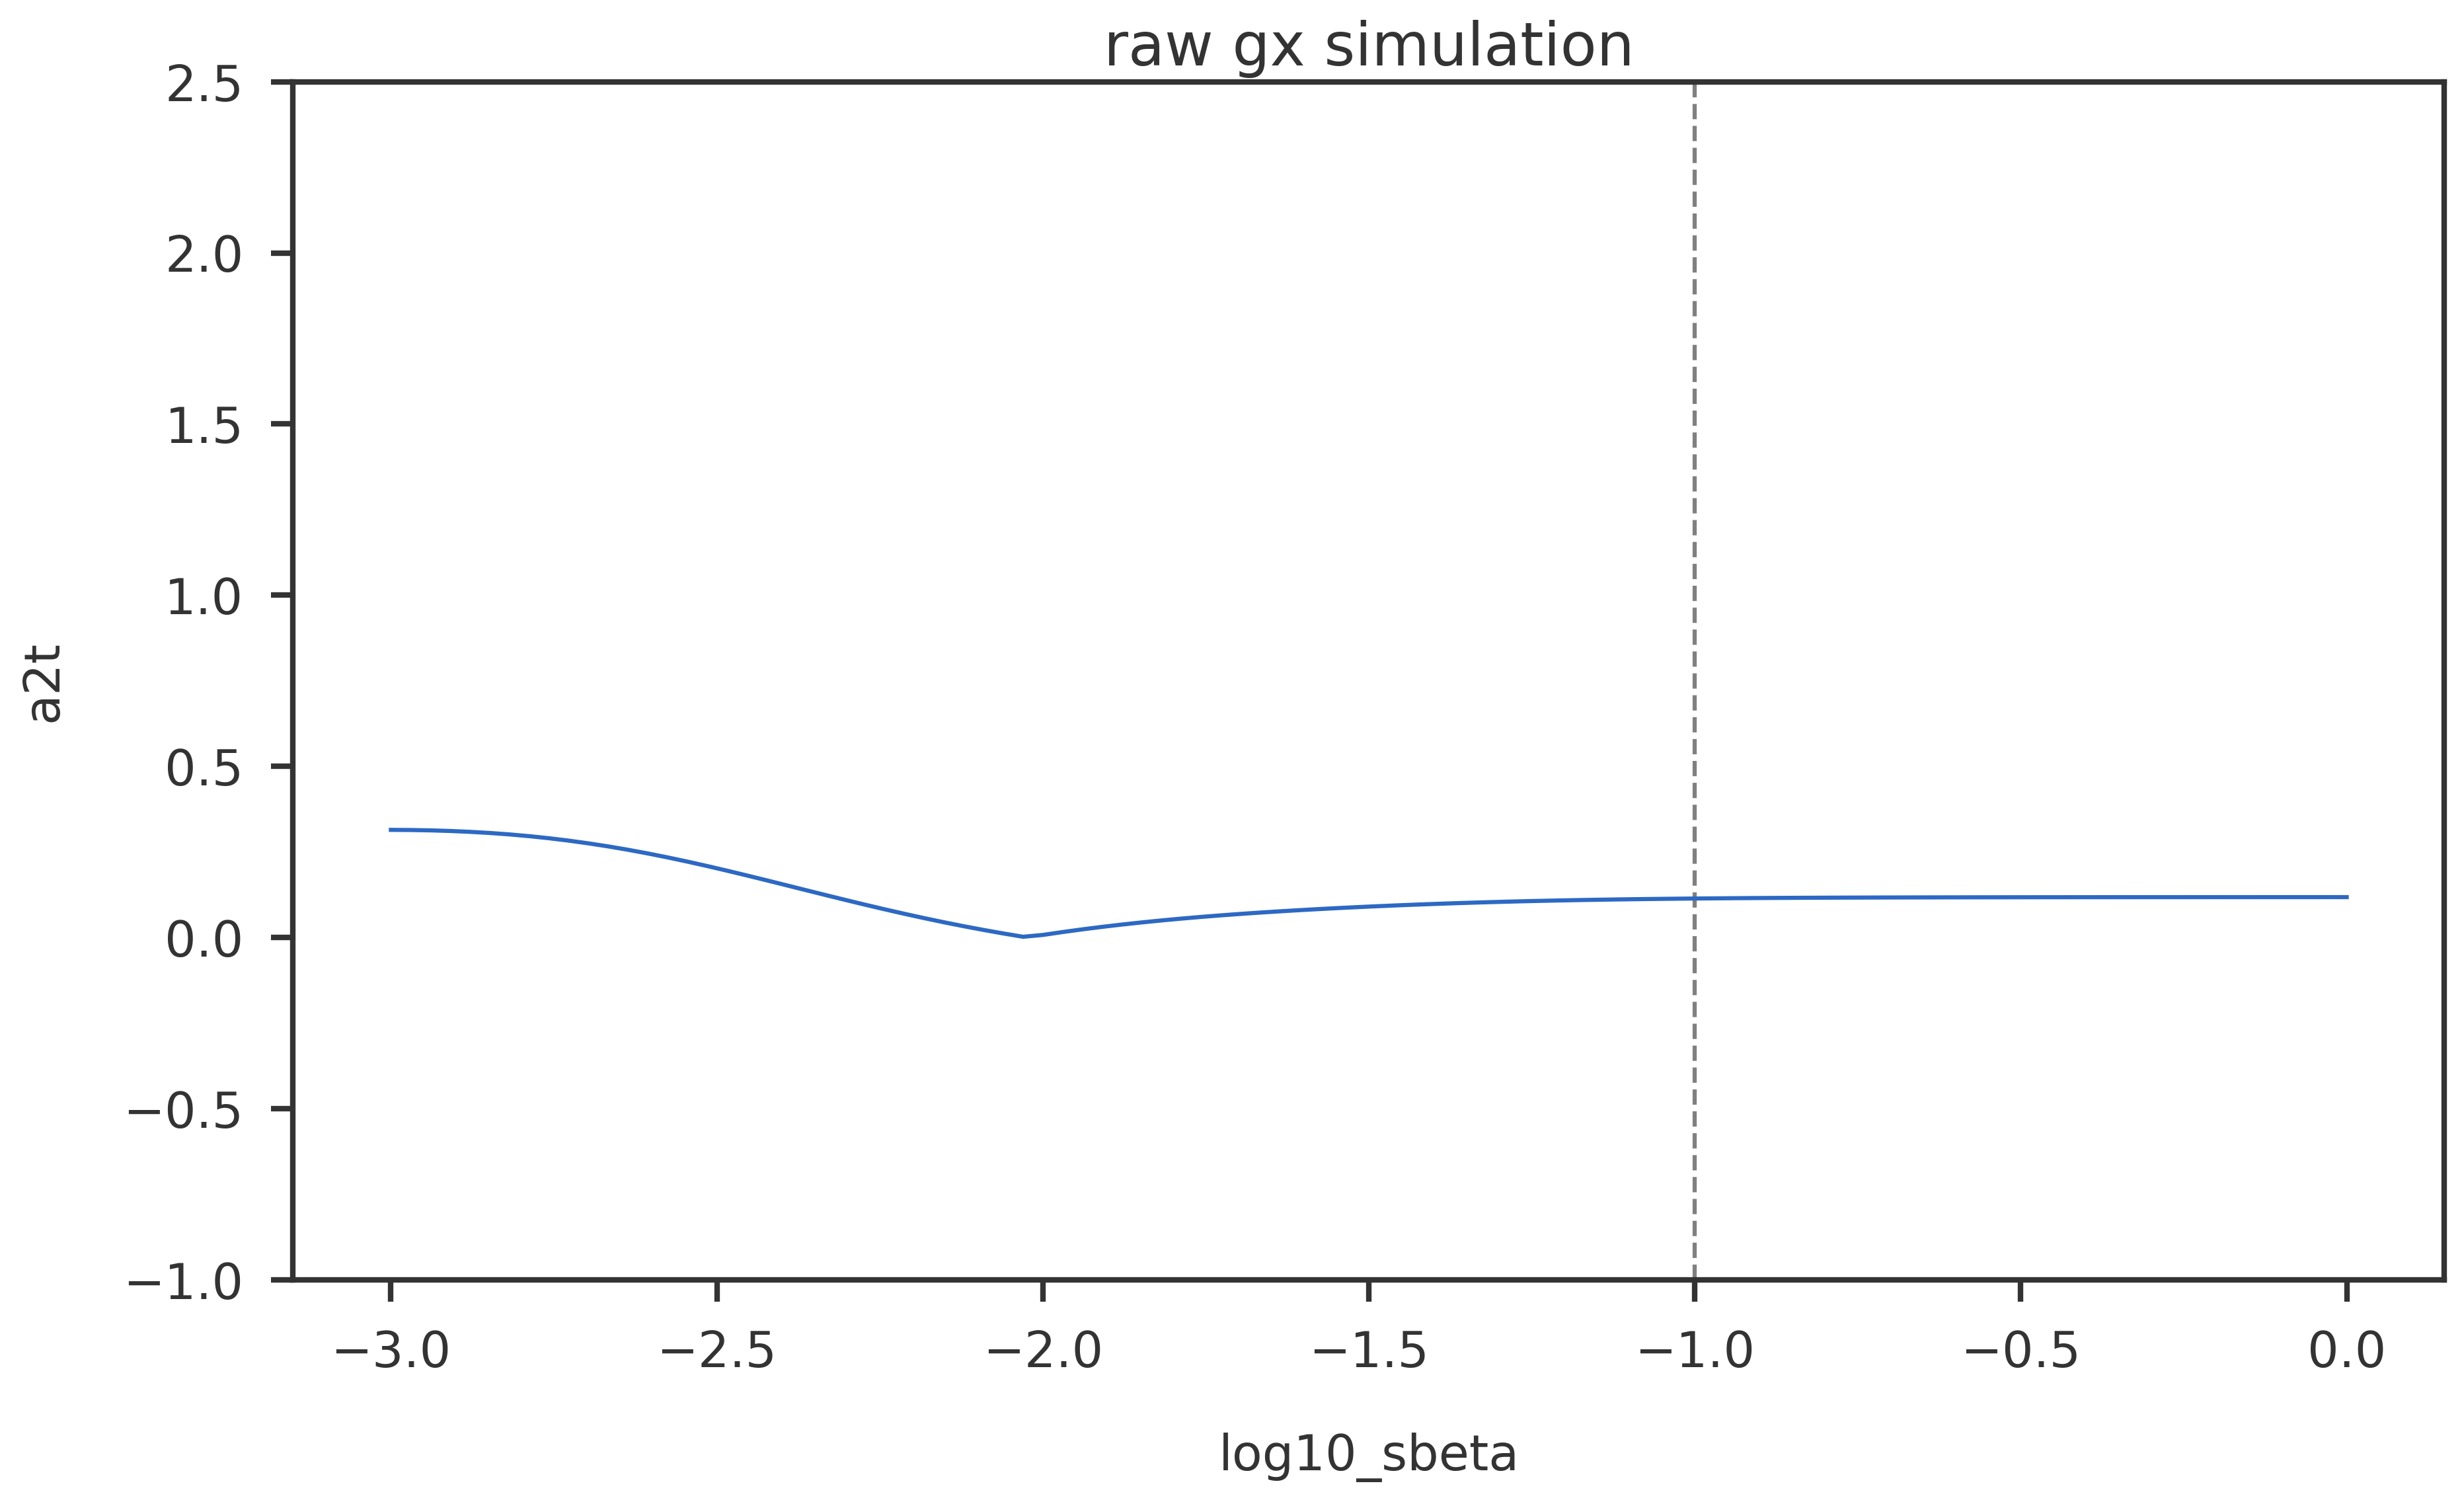

In [41]:
### Whole blood gtex_v8
sbeta_bg = list()
a2t_bg = list()
resdir = "/usr/users/fsimone/sb_optimization/simulations/11995_450_10_800_30_100_100_0.01_0.5_0.0_1.0_0.6_4.0_0.1_20_0.02/sim001"
with open(os.path.join(resdir,"gx_bg_norm_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta_bg.append(float(arr[0]))
        a2t_bg.append(abs(float(arr[1])))
        
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.plot(np.log10(sbeta_bg), a2t_bg)
ax1.vlines(np.log10(0.1), -1, 2.5, color='gray', linestyle='dashed')
ax1.set_xlabel("log10_sbeta")
ax1.set_ylabel("a2t")
ax1.set_ylim(-1,2.5)
ax1.set_title("raw gx simulation")

plt.show()

In [21]:
# Cross-mappability filter on and off for whole blood

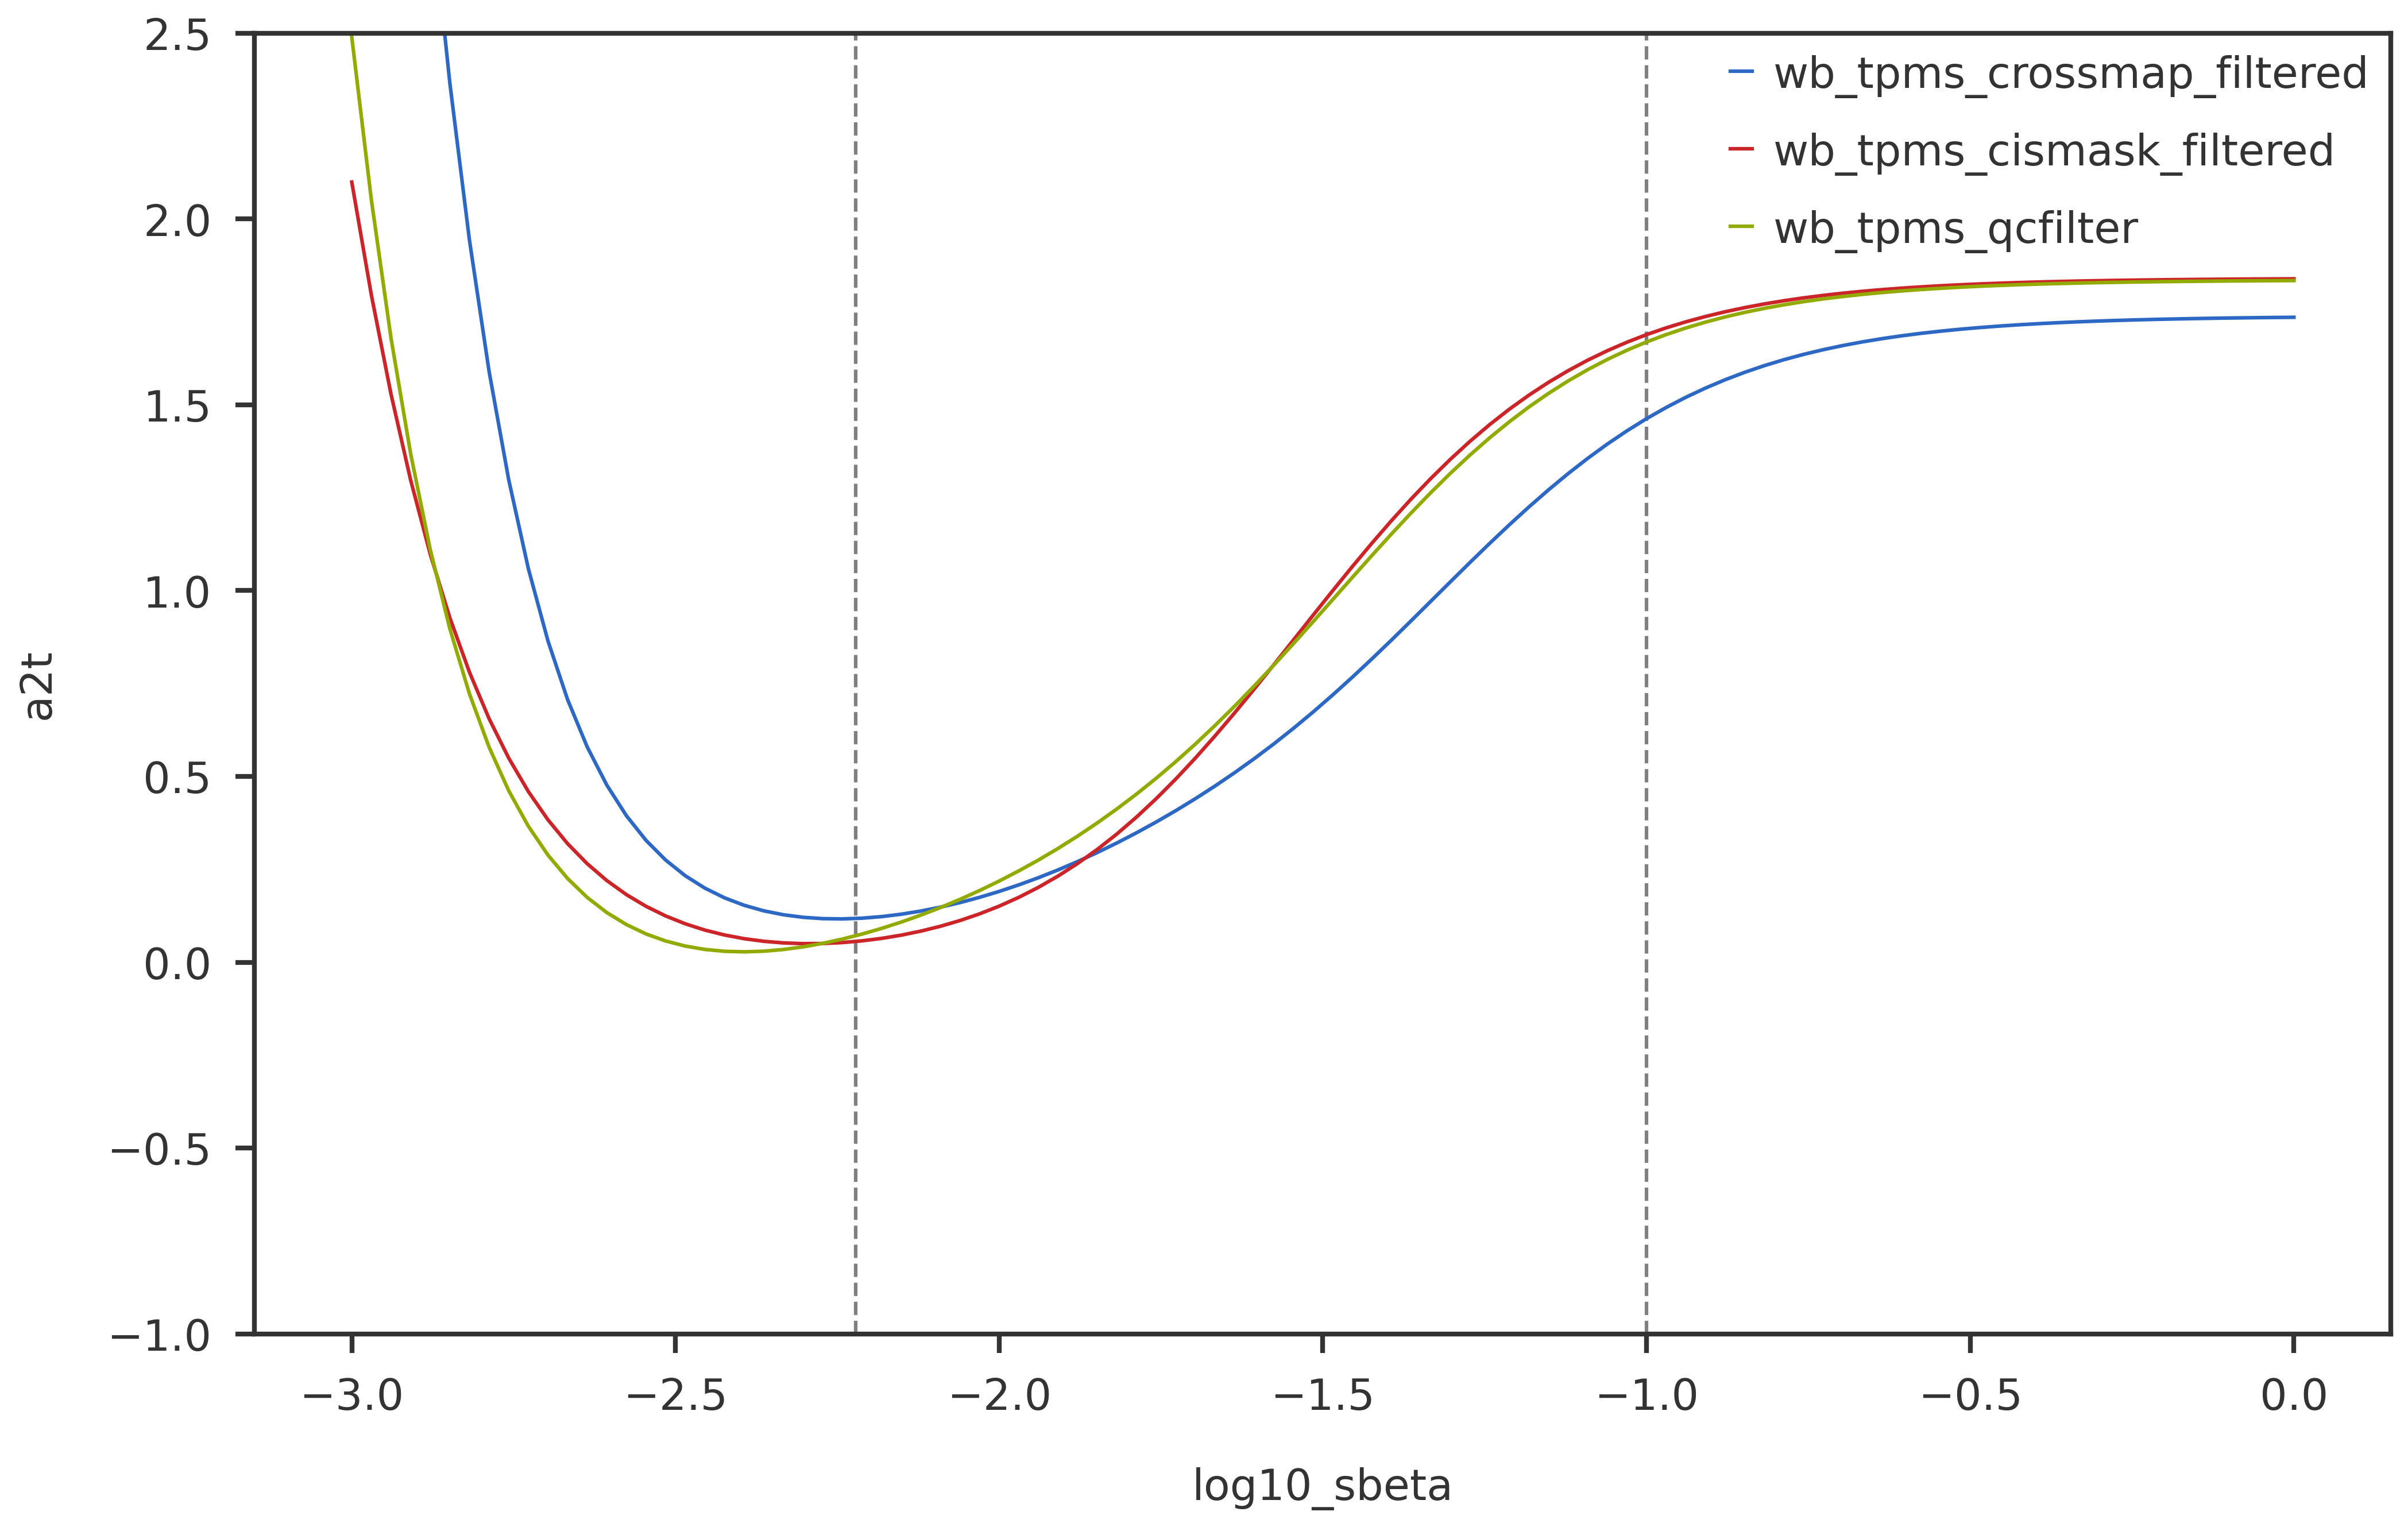

In [46]:
plotvar=False

sbeta = list()
a2t = list()
var = list()
expr = "wb_tpms_crossmap_filtered"
resdir = f"/usr/users/fsimone/sb_optimization/simulations/{expr}/{expr}"
with open(os.path.join(resdir,f"{expr}_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta.append(float(arr[0]))
        a2t.append(abs(float(arr[1])))
        var.append(abs(float(arr[2])))
        
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
ax1.plot(np.log10(sbeta), a2t, label=expr)


sbeta2 = list()
a2t2 = list()
var2 = list()
expr2 = "wb_tpms_cismask_filtered"
resdir = f"/usr/users/fsimone/sb_optimization/simulations/{expr2}/{expr2}"
with open(os.path.join(resdir,f"{expr2}_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta2.append(float(arr[0]))
        a2t2.append(abs(float(arr[1])))
        var2.append(abs(float(arr[2])))
        
# ax2 = fig.add_subplot(122)
ax1.plot(np.log10(sbeta2), a2t2, label=expr2)


sbeta3 = list()
a2t3 = list()
var3 = list()
expr3 = "wb_tpms_qcfilter"
resdir = f"/usr/users/fsimone/sb_optimization/simulations/{expr3}/{expr3}"
with open(os.path.join(resdir,f"{expr3}_sboptim.txt")) as instream:
    for line in instream:
        arr = line.rstrip().split("\t")
        sbeta3.append(float(arr[0]))
        a2t3.append(abs(float(arr[1])))
        var3.append(abs(float(arr[2])))
        
# ax2 = fig.add_subplot(122)
ax1.plot(np.log10(sbeta3), a2t3, label=expr3)
if plotvar:
    ax1.plot(np.log10(sbeta), var, label=expr+" varscore", linestyle="dashed")
    ax1.plot(np.log10(sbeta2), var2, label=expr2+" varscore", linestyle="dashed")
    ax1.plot(np.log10(sbeta3), var3, label=expr3+" varscore", linestyle="dashed")

ax1.vlines(np.log10(0.006), -1, 2.5, color='gray', linestyle='dashed')
ax1.vlines(np.log10(0.1), -1, 2.5, color='gray', linestyle='dashed')
ax1.set_xlabel("log10_sbeta")
ax1.set_ylabel("a2t")
ax1.set_ylim(-1,2.5)
ax1.legend()


plt.show()